In [1]:
from pathlib import Path

from asi import load_spectral_image


In [2]:
root = Path(
    "/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/.shortcut-targets-by-id/1ocbOeLzyp77oxTh8bsHw1prEEFrSm_aE/Lectures+Exercises/LectureExercise #5, Freelook and bmp/Colorchecker 121 ms (for Freelook demo)/capture/",
)



In [3]:
si_path = root / "Colorchecker"
spectral_image, envi_header = load_spectral_image(str(si_path))
spectral_image.shape

(512, 512, 204)

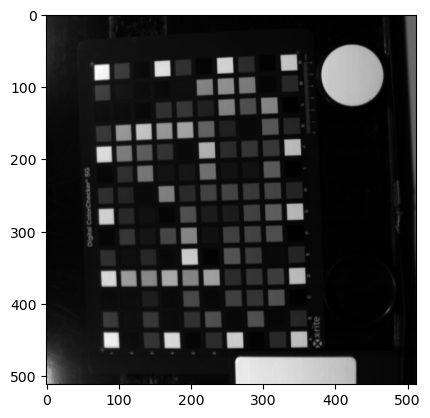

In [4]:
import matplotlib.pyplot as plt

plt.imshow(spectral_image[:, :, 50], cmap="gray")

In [5]:
import shutil

header_path = si_path.with_suffix(".hdr")
dst_root = Path("./saveddata")
dst_header_path = dst_root / "colorchecker_bip.hdr"
if not header_path.exists():
    shutil.copy(header_path, dst_header_path)

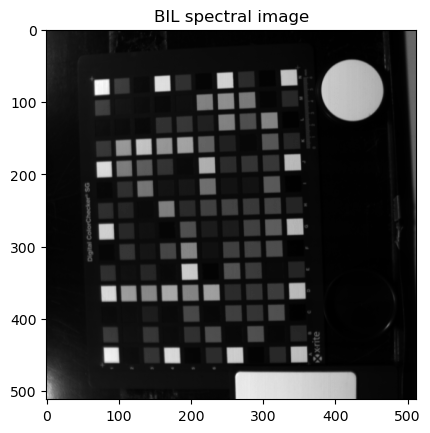

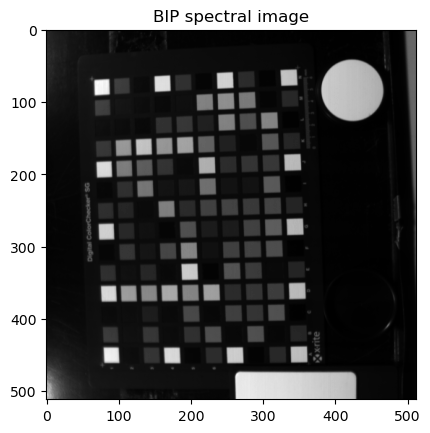

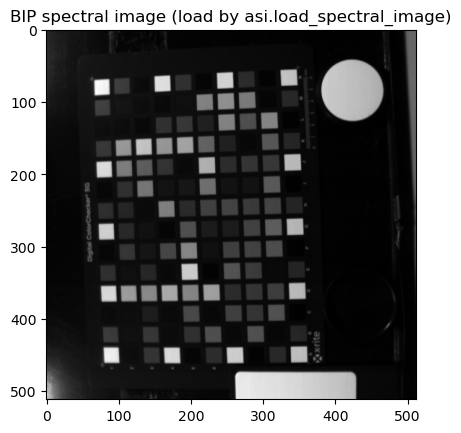

In [6]:
import numpy as np
from asi import parse_envi_header


bil_path = root / "Colorchecker"
# load spectral image manually
bil_raw_path = bil_path.with_suffix(".raw")
with bil_raw_path.open("rb") as f:
    raw = np.fromfile(f, dtype=np.uint16)

bil_header_path = bil_path.with_suffix(".hdr")
with bil_header_path.open("r") as f:
    header_content = f.readlines()
bil_header = parse_envi_header(header_content)
lines = int(bil_header["lines"])
bands = int(bil_header["bands"])
samples = int(bil_header["samples"])

new_shape = (lines, bands, samples)
bil_spectral_image = raw.reshape(new_shape)

plt.imshow(bil_spectral_image[:, 50, :], cmap="gray")
plt.title("BIL spectral image")
plt.show()


# reshape BIL to BIP
bip_spectral_image = bil_spectral_image.transpose(0, 2, 1)

plt.imshow(bip_spectral_image[:, :, 50], cmap="gray")
plt.title("BIP spectral image")
plt.show()

# write BIP spectral image
dst_raw_path = dst_root / "colorchecker_bip.raw"
bip_spectral_image.flatten().tofile(dst_raw_path)

# load BIP spectral image automatically
bpi_path = dst_root / "colorchecker_bip"
spectral_image, envi_header = load_spectral_image(str(bpi_path))

plt.imshow(spectral_image[:, :, 50], cmap="gray")
plt.title("BIP spectral image (load by asi.load_spectral_image)")
plt.show()